In [113]:
from sklearn.datasets import make_blobs

In [114]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

In [115]:
import matplotlib.pyplot as plt 

In [116]:
# X[:,0] # -> : Tüm satırları al -> [0] 0. sütunu al.


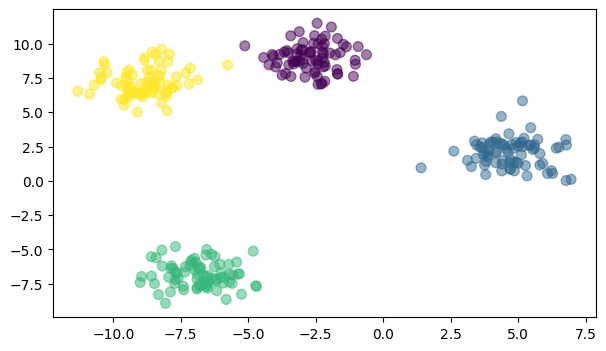

In [117]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0], X[:,1], c=y_true, s=50, alpha=0.5) 


In [118]:

import pandas as pd

In [119]:
df = pd.read_csv("Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
X = df[ [ "Annual Income (k$)", "Spending Score (1-100)"] ].values #df->arraye çevir2

In [121]:
from sklearn.cluster import KMeans

In [122]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [123]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [124]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [125]:
y = model.predict(X)

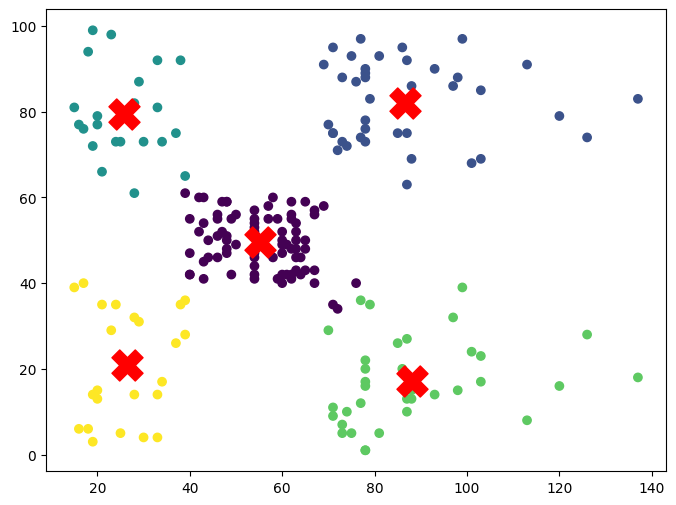

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red",s=500, marker="X")
plt.show()

In [127]:
# Dirsek (Elbow) Method


In [128]:
# inertia => parametre - her noktanın kendi merkezine uzaklığının karelerinin toplamı. düştükçe perfonmasın artıgını gösterrir
model.inertia_



44448.45544793371

In [129]:
def elbow_method():
    inertias = []
    for k in range(2,11):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

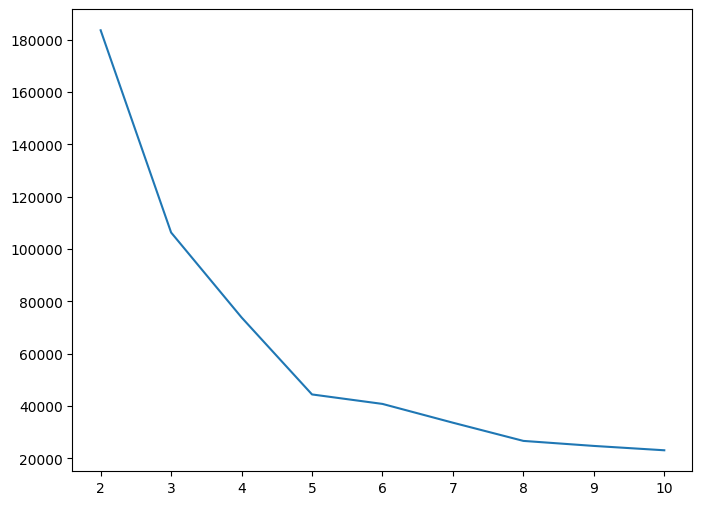

In [130]:
elbow_method()

In [131]:
#silhouette method->kendi merkezine yakınlık diger merkeze uzaklık

In [132]:
from sklearn.metrics import silhouette_score

In [133]:
def silh_method():
    scores=[]
    for k in range(2,11):
        kmeans=KMeans(n_clusters=k ,random_state=42)
        y=kmeans.fit_predict(X) #egit annında testest 
        scores.append(silhouette_score(X,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11),scores)
    plt.show()
             


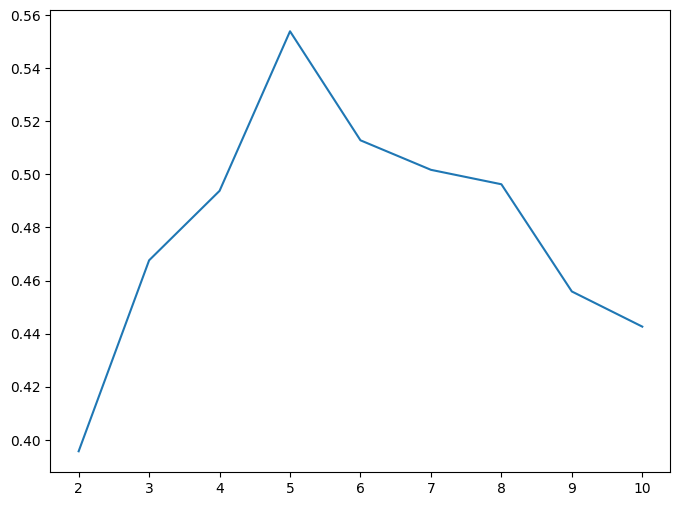

In [134]:
silh_method()

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [136]:
labels = model.predict(X)  # Burada X: ölçeklenmemiş, orijinal veri
dbi = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 0.5725628995597082


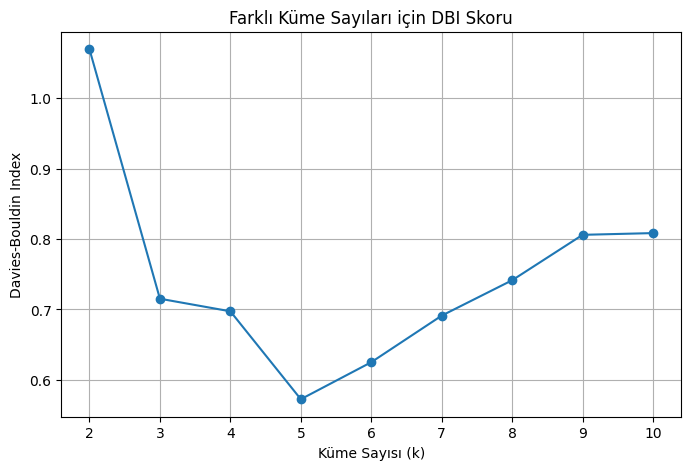

In [137]:
# DBI değerlerini tutmak için liste
dbi_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)  # Unutma: model önceden ölçeklenmemiş X ile eğitilmişti
    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

# Grafik çizimi
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_scores, marker='o')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Farklı Küme Sayıları için DBI Skoru")
plt.grid(True)
plt.xticks(cluster_range)
plt.show()


In [140]:
# Küme merkezlerini DataFrame olarak yazdıralım5
centroids = pd.DataFrame(model.cluster_centers_, columns=["Annual Income", "Spending Score"])
centroids["Profile"] = ""

for i, row in centroids.iterrows():
    income = row["Annual Income"]
    spending = row["Spending Score"]

    if income > 70:
        income_tag = "Yüksek Gelir"
    elif income > 40:
        income_tag = "Orta Gelir"
    else:
        income_tag = "Düşük Gelir"

    if spending > 70:
        spend_tag = "Yüksek Harcama"
    elif spending > 40:
        spend_tag = "Orta Harcama"
    else:
        spend_tag = "Düşük Harcama"

    centroids.loc[i, "Profile"] = f"{income_tag} / {spend_tag}"

print(centroids)


   Annual Income  Spending Score                        Profile
0      56.464789       49.774648      Orta Gelir / Orta Harcama
1      97.090909       86.090909  Yüksek Gelir / Yüksek Harcama
2      79.000000       16.592593   Yüksek Gelir / Düşük Harcama
3      23.428571       84.785714   Düşük Gelir / Yüksek Harcama
4      24.583333        9.583333    Düşük Gelir / Düşük Harcama
5      76.960000       80.800000  Yüksek Gelir / Yüksek Harcama
6      31.533333       35.866667    Düşük Gelir / Düşük Harcama
7     109.700000       22.000000   Yüksek Gelir / Düşük Harcama
8      33.500000       66.250000     Düşük Gelir / Orta Harcama
9     127.666667       78.666667  Yüksek Gelir / Yüksek Harcama


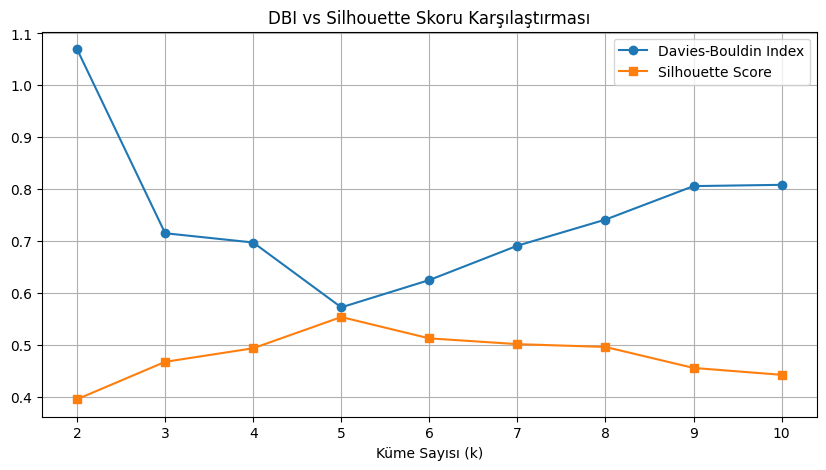

In [141]:
dbi_scores = []
sil_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    dbi_scores.append(davies_bouldin_score(X, labels))
    sil_scores.append(silhouette_score(X, labels))

# Grafik
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, dbi_scores, marker='o', label='Davies-Bouldin Index')
plt.plot(cluster_range, sil_scores, marker='s', label='Silhouette Score')
plt.xlabel("Küme Sayısı (k)")
plt.title("DBI vs Silhouette Skoru Karşılaştırması")
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

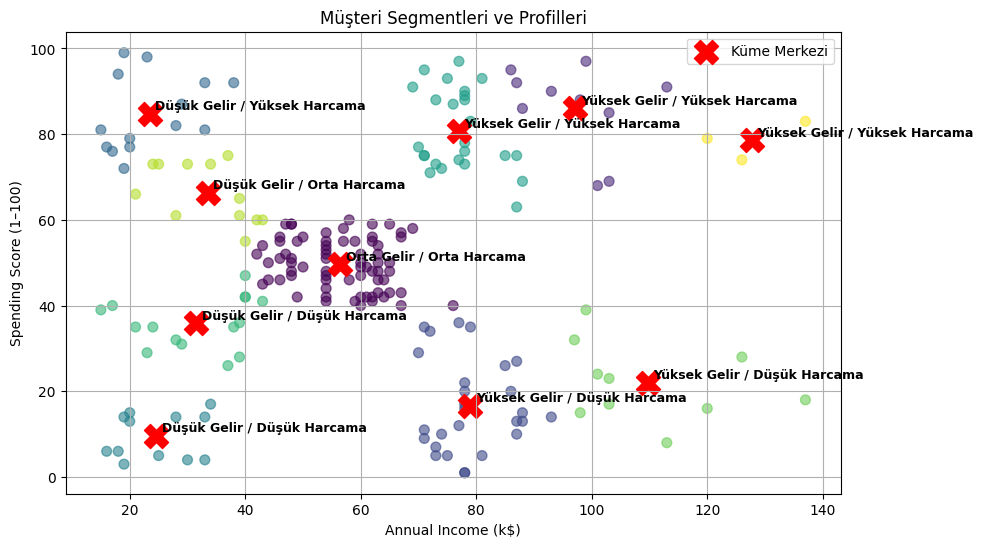

In [142]:
import matplotlib.pyplot as plt

# Veriyi ve etiketleri al
X_plot = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
labels = model.labels_

# Küme merkezlerini ve profil etiketlerini al
centroids = pd.DataFrame(model.cluster_centers_, columns=["Annual Income", "Spending Score"])
centroids["Profile"] = [""] * len(centroids)

5225
# Küme merkezi etiketleri
for i, row in centroids.iterrows():
    plt.text(row["Annual Income"] + 1, row["Spending Score"] + 1, row["Profile"], fontsize=9, fontweight='bold')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Müşteri Segmentleri ve Profilleri")
plt.grid(True)
plt.legend()
plt.show()


In [144]:
df["Cluster"] = model.predict(X)


In [145]:
# Her kümenin ortalama verileri
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary["Yorum"] = ""

for idx, row in cluster_summary.iterrows():
    income = row["Annual Income (k$)"]
    spend = row["Spending Score (1-100)"]

    if income > 70 and spend < 40:
        yorum = "Zengin ama harcamayan (tasarrufçu)"
    elif income > 70 and spend > 60:
        yorum = "Zengin ve harcayan (lüks hedef kitle)"
    elif income < 40 and spend > 60:
        yorum = "Geliri düşük ama harcama eğilimi yüksek (dikkat çekici)"
    elif income < 40 and spend < 40:
        yorum = "Düşük gelir ve düşük harcama (düşük potansiyel)"
    else:
        yorum = "Orta sınıf, dengeli müşteri"

    cluster_summary.loc[idx, "Yorum"] = yorum

print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)  \
Cluster                                               
0                 56.464789               49.774648   
1                 97.090909               86.090909   
2                 79.000000               16.592593   
3                 23.428571               84.785714   
4                 24.583333                9.583333   
5                 76.960000               80.800000   
6                 31.533333               35.866667   
7                109.700000               22.000000   
8                 33.500000               66.250000   
9                127.666667               78.666667   

                                                     Yorum  
Cluster                                                     
0                              Orta sınıf, dengeli müşteri  
1                    Zengin ve harcayan (lüks hedef kitle)  
2                       Zengin ama harcamayan (tasarrufçu)  
3        Geliri düşük ama harcama 